## Notebook for exploring the market behavior

According to He, Huang, and Zhou 2023

In [269]:
import numpy as np
import matplotlib.pyplot as plt

In [270]:
## constants
# screening ability
xs = 0.8
xw = 0.7

# market size
theta = 0.99
N = 10000

# other derivations
tau = theta/(1-theta)

### what does the distribution look like?

In [271]:
def phi(r):
    numer = xs
    denom = (tau/(1-xw))*r - 1 + xs
    return numer/denom

In [272]:
runderscore = (1 - xw)/tau
rbar = 0.1

In [273]:
rs = np.linspace(runderscore, rbar, 100)

In [274]:
dist = 1 - phi(rs)

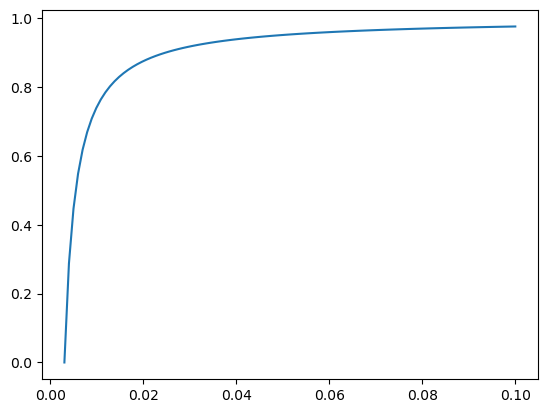

In [275]:
plt.plot(rs, dist)

In [276]:
# randomly generate from 0-1 and find the closest value that is smaller than the generated value
def draw_from_dist(dist):
    r = np.random.rand()
    for i in range(len(dist)):
        if r < dist[i] and r > dist[i-1]:
            return rs[i-1]
    
    return rs[-1]

In [277]:
# validate
draws = [draw_from_dist(dist) for i in range(100000)]

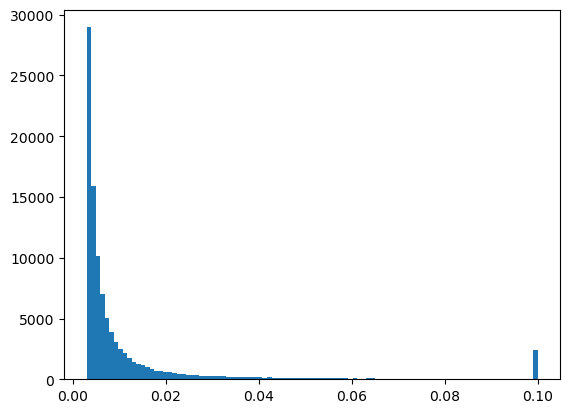

In [278]:
_ = plt.hist(draws, bins=100)

## now do the same for the weak lender

In [279]:
mw = dist[-1]
def fw(r):
    numer = phi(r) - (1-dist[-1])
    denom = 1 - (1-dist[-1])
    return numer/denom

In [280]:
distw = [fw(r) for r in rs]
distw = 1 - np.array(distw)

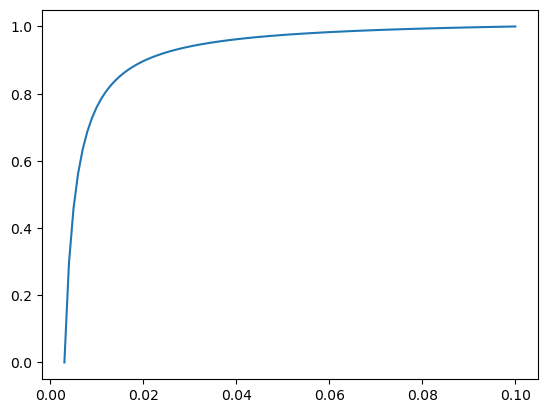

In [281]:
plt.plot(rs, distw)

In [282]:
drawsw = [draw_from_dist(distw) for i in range(100000)]

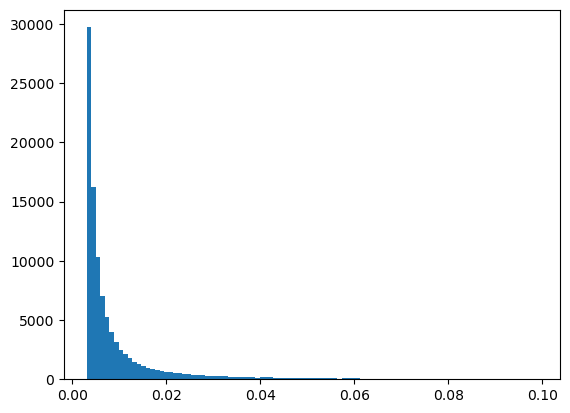

In [283]:
_ = plt.hist(drawsw, bins=99)

## now let's test how many borrowers will go for each lender

In [284]:
phh = theta+(1-theta)*(1-xs)*(1-xw)
phl = (1-theta)*(1-xs)*xw
plh = (1-theta)*xs*(1-xw)

In [286]:
print('weak',  phh*(0.5-0.5*phi(rs[-1])**2)+ plh*mw)
print('strong',  phh*(0.5+0.5*phi(rs[-1])**2)+ phl)

weak 0.49734681737061276
strong 0.49699464604402144
